In [1]:
#########################
######### ROUTINE TO PLOT THE SEASONAL MEAN OF ANY VARIABLE OVER AN ALREADY 
######### SELECTED REGION.
#########################

import cartopy

import cartopy.feature as cfeat
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import xarray as xr
import numpy as np

import datetime
import pandas

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
#########################
######### DICTIONARIES DEFINITION 
#########################

Range_MLD = {
    'lab' : {
        'vmin' : 20, 
        'vmax' : 2000},
    'gul' : {
        'vmin' : 20, 
        'vmax' : 1000},
    'noe' : {
        'vmin' : 10, 
        'vmax' : 1600},
}


#Colorbar parameters
color_bar = {
    'cmap' : 'YlGnBu',
    'orientation' : 'vertical',
    'title_cbr' : 'depth [m]'
}



reg_ext = {
    'lab': {
        'lon' : (-60, -30),
        'lat' : (50, 65),
        'name' : 'Labrador and Irminger Seas'
    },
    'gul': {
        'lon' : (-75, -45),
        'lat' : (30, 45),
        'name' : 'Gulf Stream'
    },
    'noe': {
        'lon' : (-30, -5),
        'lat' : (45, 60),
        'name' : 'North East Sea'
    }
}

In [3]:
def Grid(data_set):
    x = data_set.longitude
    y = data_set.latitude
    
    x, y = np.meshgrid(x, y)
    return(x, y)


In [4]:
dir_1 = '/home/lgarcia/Documents/data_ARMOR/'
fl_n1 = 'ARMOR_*.nc'

c_armor = xr.open_mfdataset(dir_1 + fl_n1)
mld_a = c_armor.mlotst

## Just a test to plot histograms

In [5]:
## some other packages
from scipy import stats
from matplotlib import ticker

4415.8 10.0


<IPython.core.display.Javascript object>


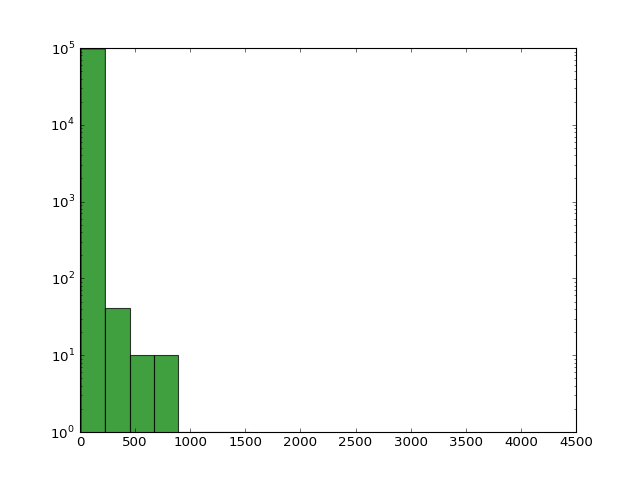

In [18]:
mx = np.nanmax(mld_a[:])
mn = np.nanmin(mld_a[:])

print(mx, mn)
d_frame = mld_a[250].to_dataframe()
d_nonan = d_frame.dropna(how='any')

%matplotlib notebook

plt.yscale("log")

values = d_nonan.mlotst
n, bins, patches = plt.hist(values, 20, range=(mn, mx), facecolor='g', alpha=0.75)

#plt.grid()
#plt.show()

#print(patches)
#print(bins)


## Making the histogram for each time stamp

In [7]:
## Function to crop the dataset

def Crops(coord, d_set):
    lon1, lon2 = reg_ext[coord]['lon']
    lat1, lat2 = reg_ext[coord]['lat']
    name_fig = reg_ext[coord]['name']

    return(d_set.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2)))


### Gulf stream

In [8]:
coord = 'gul'
cropped_d = Crops(coord, mld_a)
n_bins = 250

mn = np.nanmin(cropped_d[:])
mx = np.nanmax(cropped_d[:])

print(mn,mx)

10.0998535 3999.0


In [9]:
ind = np.linspace(mn, mx,n_bins)
heigth = np.empty(n_bins)

#len(cropped_d.time)
for i in range(len(cropped_d.time)):
    d_frame = cropped_d[i].to_dataframe()
    d_nonan = d_frame.dropna(how='any')
    
    mean = d_nonan.mlotst.mean()
    sd = d_nonan.std()
    #a = np.append(a, mean)
    #s = np.append(s, sd)
    
    values = d_nonan.mlotst
    hist, bins = np.histogram(values, bins=n_bins, range=(mn, mx), normed=False)
    
    heigth = np.vstack((heigth, hist))

h = np.delete(heigth, 0, 0)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


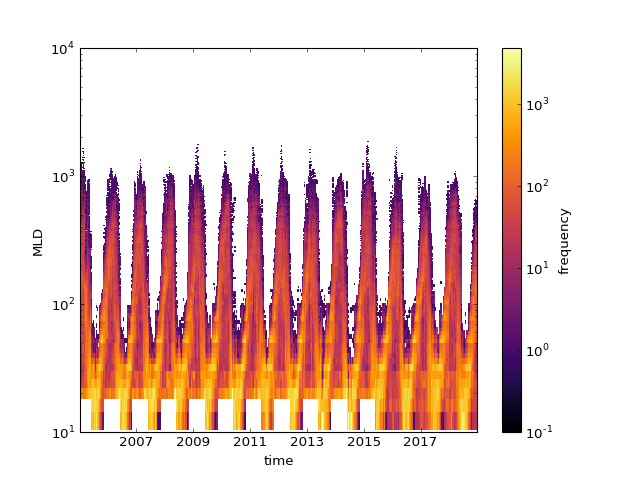

In [15]:
x = mld_a.time
y = np.arange(mn, mx, abs((mn-mx)/n_bins))
X, Y = np.meshgrid(x, y)

vmin = h.min() + 0.1
vmax = h.max()

fig, ax = plt.subplots()

ax.set_yscale("log", nonposy='clip')
cs = ax.pcolor(X, Y, h.T,  
                 norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='inferno')

ax.set_xlabel('time')
ax.set_ylabel('MLD')

cb = fig.colorbar(cs, ax=ax, orientation='vertical')
cb.set_label('frequency')
    
#name_fig = 'MLD_' + year[dat] + '.pdf'
#fig.savefig(name_fig, bbox_inches='tight')
plt.show()

### Labrador Irminger seas

In [11]:
coord = 'lab'
cropped_d = Crops(coord, mld_a)
n_bins = 250

mn = np.nanmin(cropped_d[:])
mx = np.nanmax(cropped_d[:])

print(mn,mx)

ind = np.linspace(mn, mx,n_bins)
heigth = np.empty(n_bins)

#len(cropped_d.time)
for i in range(len(cropped_d.time)):
    d_frame = cropped_d[i].to_dataframe()
    d_nonan = d_frame.dropna(how='any')
    
    mean = d_nonan.mlotst.mean()
    sd = d_nonan.std()
    #a = np.append(a, mean)
    #s = np.append(s, sd)
    
    values = d_nonan.mlotst
    hist, bins = np.histogram(values, bins=n_bins, range=(mn, mx), normed=False)
    
    heigth = np.vstack((heigth, hist))

h = np.delete(heigth, 0, 0)

10.0 4150.4


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.


<IPython.core.display.Javascript object>


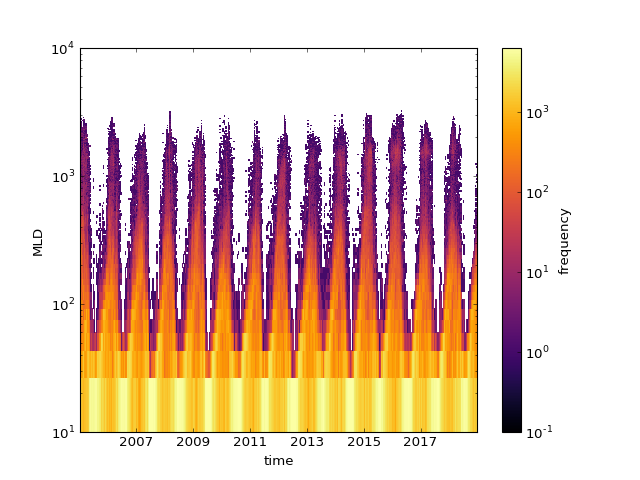

In [12]:
x = mld_a.time
y = np.arange(mn, mx, abs((mn-mx)/n_bins))
X, Y = np.meshgrid(x, y)

vmin = h.min() + 0.1
vmax = h.max()

fig, ax = plt.subplots()

ax.set_yscale("log", nonposy='clip')
cs = ax.pcolor(X, Y, h.T,  
                 norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='inferno')

ax.set_xlabel('time')
ax.set_ylabel('MLD')

cb = fig.colorbar(cs, ax=ax, orientation='vertical')
cb.set_label('frequency')
    
#name_fig = 'MLD_' + year[dat] + '.pdf'
#fig.savefig(name_fig, bbox_inches='tight')
plt.show()

### North East

In [13]:
coord = 'noe'
cropped_d = Crops(coord, mld_a)
n_bins = 500

mn = np.nanmin(cropped_d[:])
mx = np.nanmax(cropped_d[:])

print(mn,mx)

ind = np.linspace(mn, mx,n_bins)
heigth = np.empty(n_bins)

#len(cropped_d.time)
for i in range(len(cropped_d.time)):
    d_frame = cropped_d[i].to_dataframe()
    d_nonan = d_frame.dropna(how='any')
    
    mean = d_nonan.mlotst.mean()
    sd = d_nonan.std()
    #a = np.append(a, mean)
    #s = np.append(s, sd)
    
    values = d_nonan.mlotst
    hist, bins = np.histogram(values, bins=n_bins, range=(mn, mx), normed=False)
    
    heigth = np.vstack((heigth, hist))

h = np.delete(heigth, 0, 0)

10.399902 1994.2


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.


<IPython.core.display.Javascript object>


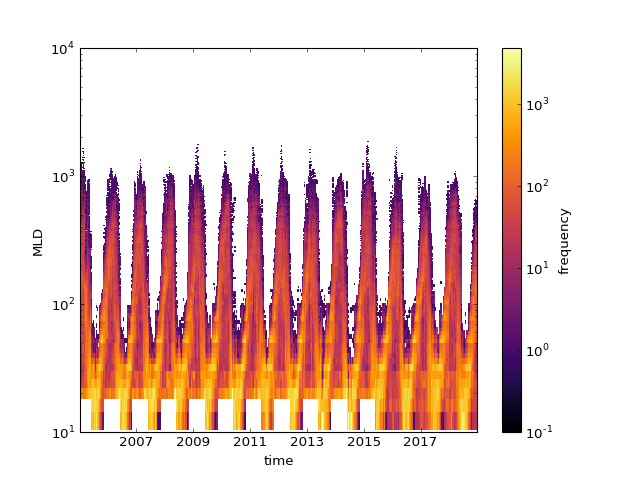

In [14]:
x = mld_a.time
y = np.arange(mn, mx, abs((mn-mx)/n_bins))
X, Y = np.meshgrid(x, y)

vmin = h.min() + 0.1
vmax = h.max()

fig, ax = plt.subplots()

ax.set_yscale("log", nonposy='clip')
cs = ax.pcolor(X, Y, h.T,  
                 norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='inferno')

ax.set_xlabel('time')
ax.set_ylabel('MLD')

cb = fig.colorbar(cs, ax=ax, orientation='vertical')
cb.set_label('frequency')
    
#name_fig = 'MLD_' + year[dat] + '.pdf'
#fig.savefig(name_fig, bbox_inches='tight')
plt.show()